In [1]:
import numpy as np
from skimage import io, data, transform, filters, util, color, util, exposure
import matplotlib.pyplot as plt
from scipy import ndimage

In [2]:
def show(img_list, caption_list, Axis=False):
    n = len(img_list)
    f, ax = plt.subplots(1,n, figsize=(10+5*(n-1),10))
    for i in range(n):
        ax[i].imshow(img_list[i], cmap='gray')
        ax[i].set_title(caption_list[i])
        if not Axis:
            ax[i].set_axis_off()

In [3]:
def mapping(img):
    nimg = util.img_as_float(img)
    mmin = np.min(nimg)
    nimg = nimg - mmin
    mmax = np.max(nimg)
    return nimg/mmax

# Questão 1

<p>Testar as funções de transformação geométrica: 
rotação, escala, translação, cisalhamento em imagens. 

*   rotação: *transform.rotate(...)*
*   escala: *transform.rescale(...)*
*   traslação: *transform.AffineTransform(...)* e *transform.warp(..)*
*   cisalhamento: *transform.AffineTransform(...)* e *transform.warp(..)*

<ol>
  <li> <b>skimage.transform.rotate</b>(image, angle, resize=False, center=None, order=None, mode='constant', cval=0, clip=True, preserve_range=False): 
  Rotate image by a certain angle around its center.
      
  Parameters
  <ul>
  <li> image: ndarray. Input image.</li>
  <li> angle: float. Rotation angle in degrees in counter-clockwise direction.</li>
  <li> resize: bool, optional. Determine whether the shape of the output image will be automatically calculated, so the complete rotated image exactly fits. Default is False. </li>
  <li> center: iterable of length 2. The rotation center. If center=None, the image is rotated around its center, i.e. center=(cols / 2 - 0.5, rows / 2 - 0.5). Please note that this parameter is (cols, rows), contrary to normal skimage ordering. </li>
  </ul>
  Result
  <ul> 
  <li> rotated: ndarray. Rotated version of the input.</li>
  </ul> 
      
  <li> <b>skimage.transform.rescale</b>(image, scale, channel_axis=None): Scale image by a certain factor.
      
  Parameters
    <ul>
    <li> image: ndarray. Input image.</li>
    <li> scale: {float, tuple of floats}. Scale factors. S</li>
    <li> channel_axis: int or None, optional. If None, the image is assumed to be a grayscale (single channel) image. Otherwise, this parameter indicates which axis of the array corresponds to channels </li>
    </ul>
  Result
    <ul> 
    <li> rotated: ndarray. Scaled version of the input.</li>
    </ul> 

  <li><b>skimage.transform.AffineTransform</b>(matrix=None, scale=None, rotation=None, shear=None, translation=None, dimensionality=2)</li>
    
  Parameters
  <ul>
  <li> matrix: (D+1, D+1) array, optional. Homogeneous transformation matrix. </li>
  <li> scale: {s as float or (sx, sy) as array, list or tuple}, optional.  Scale factor(s). </li>
  <li> rotation: float, optional. Rotation angle in counter-clockwise direction as radians. Only available for 2D.</li>
  <li> shear: float, optional. Shear angle in counter-clockwise direction as radians. Only available for 2D.</li>
  <li> translation: (tx, ty) as array, list or tuple, optional. Translation parameters. Only available for 2D.</li>
  </ul>

  <li><b> skimage.transform.warp</b>(image, inverse_map, map_args={}, output_shape=None, order=None, mode='constant', cval=0.0, clip=True, preserve_range=False): Warp an image according to a given coordinate transformation.</li>
    
  Parameters
  <ul>
  <li> image: ndarray. Input image. </li>
  <li> inverse_map: transformation object. Inverse coordinate map, which transforms coordinates in the output images into their corresponding coordinates in the input image. </li>
  <li> map_args: dict, optional. Keyword arguments passed to inverse_map.</li>
  <li> output_shape: tuple (rows, cols), optional. Shape of the output image generated. By default the shape of the input image is preserved. </li>
  <li> order: int, optional. The order of interpolation. The order has to be in the range 0-5: (0: Nearest-neighbor, 1: Bi-linear (default), 2: Bi-quadratic, 3: Bi-cubic, 4: Bi-quartic, 5: Bi-quintic)</li>
  </ul> 
  Result
  <ul> 
  <li> warped: double ndarray. The warped input image.</li>
  </ul>   
</ol>
</p>

(512, 512, 3)


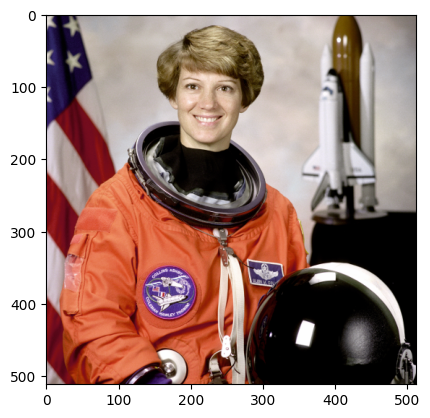

In [4]:
img = data.astronaut()
plt.imshow(img)
print(img.shape)

In [6]:
rotacao = transform.rotate(img, 25)
escala = transform.rescale(img, (0.5, 0.5, 1))
matriz_traslacao = transform.AffineTransform(scale=(1.02, 1.04), rotation=0)
traslacao = transform.warp(img, matriz_traslacao)
matriz_shear = transform.AffineTransform(scale = (1.05, 1), shear = 0.85)
shear =  transform.warp(img, matriz_shear)

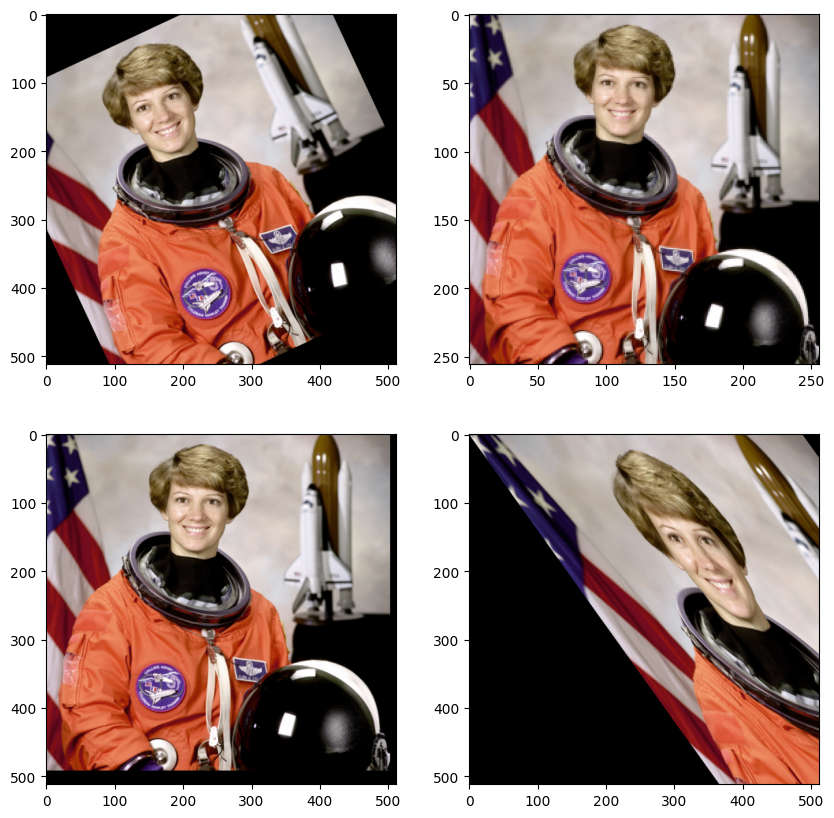

In [7]:
f, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].imshow(rotacao)
ax[0,1].imshow(escala)
ax[1,0].imshow(traslacao)
ax[1,1].imshow(shear)

# Questão 2
Dadas duas imagens, misturar ambas imagens gerando uma terceira. A forma de misturar é a seguinte: a terceira imagem estará formada pelas linhas impares da primeira imagem e as pares da segunda imagem.

<table><tr>
<td> <img src="https://drive.google.com/uc?id=1k0FG4pT6WMjFeG-V63OBXNS7_CvfY5m_" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="https://drive.google.com/uc?id=15yt6Tt5liol_jKWbkfcNXV-SoeaY706s" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="https://drive.google.com/uc?id=1FboaUm6DeM-HsHRXQfyt1tPgl6rLkGQK" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

In [ ]:
def merge(img1, img2):
  nimg = np.copy(img2)
  nimg[1::2, ::] = img1[1::2, ::] 

  return nimg

Tamanho imagem Lenna: (512, 512, 3)
Tamanho imagem clown: (512, 512, 4)


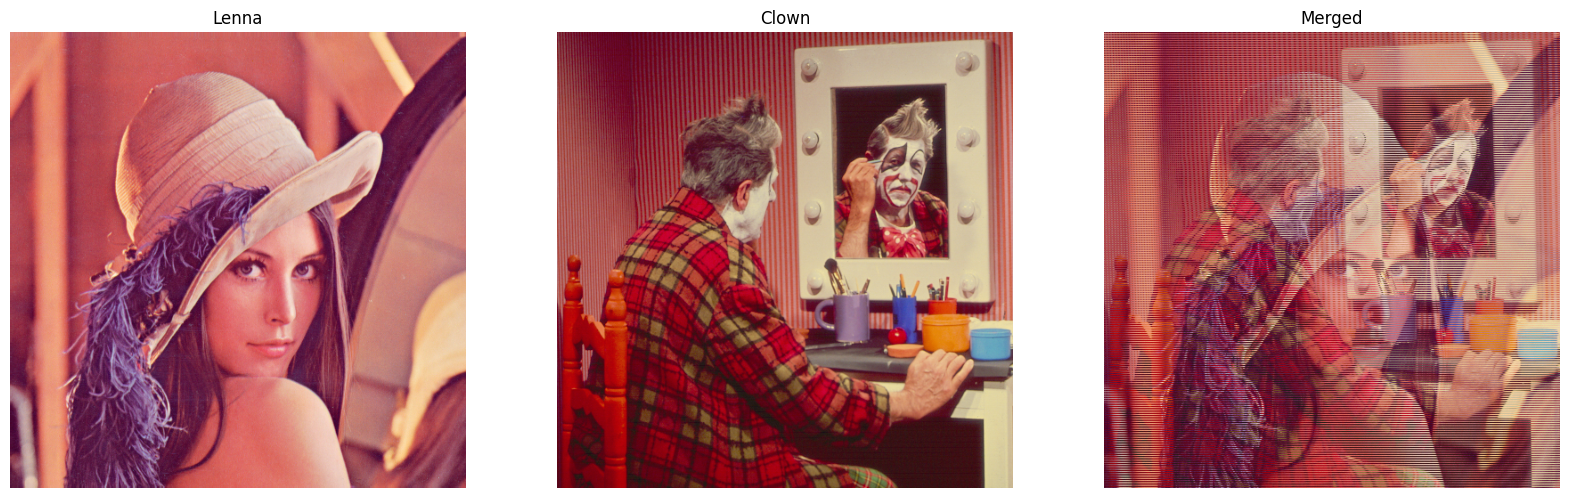

In [ ]:
lenna = io.imread('https://drive.google.com/uc?id=1k0FG4pT6WMjFeG-V63OBXNS7_CvfY5m_')
clown = io.imread('https://drive.google.com/uc?id=15yt6Tt5liol_jKWbkfcNXV-SoeaY706s')
print(f'Tamanho imagem Lenna: {lenna.shape}')
print(f'Tamanho imagem clown: {clown.shape}')
#yield
new_clown = util.img_as_ubyte(color.rgba2rgb(clown))
merged = merge(lenna, new_clown)
show([lenna, new_clown, merged], ['Lenna', 'Clown', 'Merged'])

# Questão 3

<p>Calcule o histograma da seguinte imagem. </p>


<center>
<img src="https://drive.google.com/uc?id=1Tils6Uo-h2fh3JoTcsaMexoKR1AaMXqb" alt="Drawing" style="width: 250px;"/>
</center>

<p>
<b>scipy.ndimage.histogram</b>(input, min, max, bins): Calculate the histogram of the values of an array, optionally at labels.
<ul>
<li> input: array_like. Data for which to calculate histogram.</li>
<li> min, max: int. Minimum and maximum values of range of histogram bins.</li>
<li> bins: int. Number of bins.</li>
</ul>
</p>

<p>
Através dele poderá obversar que as intensidades estão concentradas na metade da escala de intensidades, não sendo possível distinguir claramente os detalhes da imagem. Corrija esse problema por meio das seguintes funções radiométricas.

1.   Use a função *exposure.adjust_gamma()*.

  **skimage.exposure.adjust_gamma**(image, gamma=1, gain=1): Performs Gamma Correction on the input image. Also known as Power Law Transform. This function transforms the input image pixelwise according to the equation O = I**gamma after scaling each pixel to the range 0 to 1.
  <ul>
  <li> image: ndarray. Input image.</li>
  <li> gamma: float, optional. Non negative real number. Default value is 1.</li>
  <li> gain: float, optional. The constant multiplier. Default value is 1.</li>
  </ul>
Returns
  <ul>
  <li> out: ndarray. Gamma corrected output image</li>
  </ul>

2.  Tranformação *Power-law* (também conhecida como função *Gamma*)
    $$s = cr^\lambda$$ onde $c$ e $\lambda$ são constantes positivas, e $r$ é a intensidade da imagem.
<center>
<img src="https://drive.google.com/uc?id=16lffZmhq9mzzQ57haDY_zi1EOSwPELJo" alt="Drawing" width="300" class="center"/>
</center>
</p>

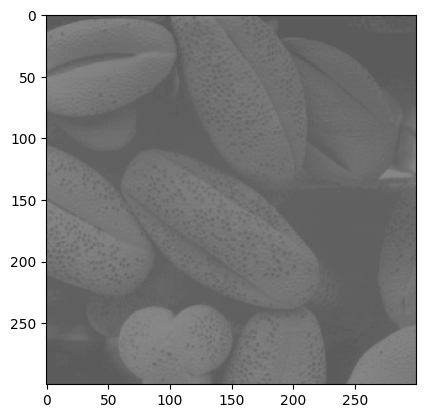

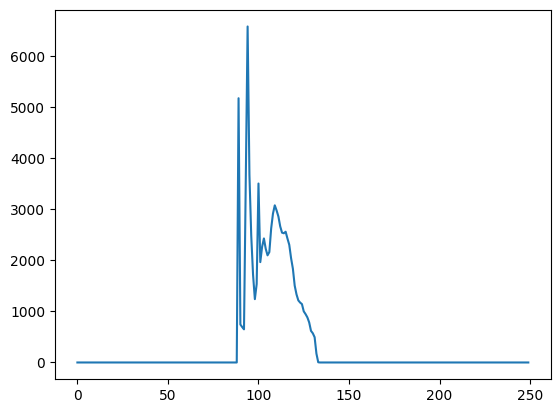

In [8]:
img2 = io.imread("https://drive.google.com/uc?id=1Tils6Uo-h2fh3JoTcsaMexoKR1AaMXqb")
plt.imshow(img2, cmap='gray', vmin =0, vmax=255)

hist = ndimage.histogram(img2, 0, 255, 250)
plt.figure()
plt.plot(hist)

3.1 Usar a função exposure.adjust_gamma

(300, 300)


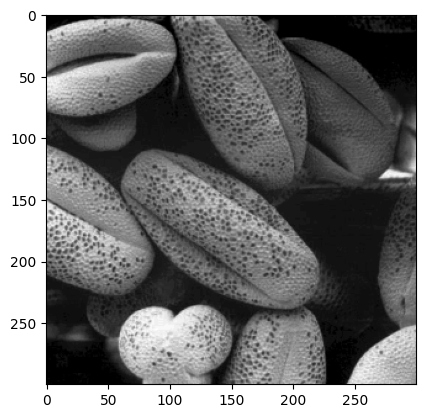

In [9]:
nimg = mapping(exposure.adjust_gamma(img2, gamma=3, gain=6))
plt.imshow(nimg, cmap='gray', vmin=0, vmax=1)
print(nimg.shape)


### 3.2 Implementar código que permita aplicar a função *Power Law* em imagens

In [10]:
def power_law(img, c=1, _lambda=0.5):
    img = util.img_as_float(img)
    nimg = (img ** _lambda) * c
    return nimg

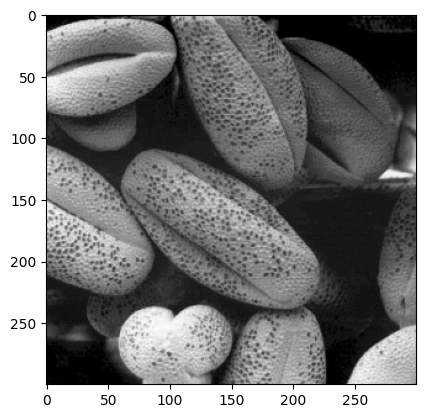

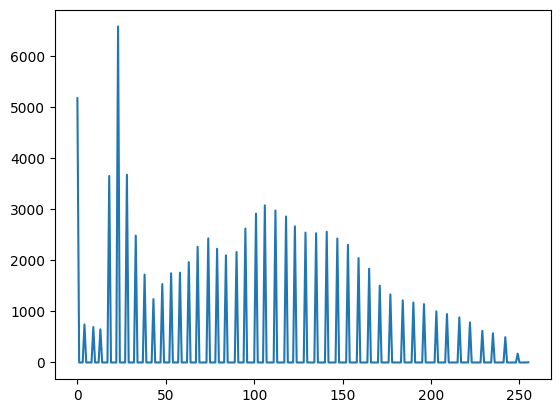

In [11]:
nimg = mapping( power_law(img2, c=1, _lambda=2) )
plt.imshow(nimg, cmap='gray', vmin=0, vmax=1)

h2 = ndimage.histogram(nimg, min=0, max=1, bins=256)
plt.figure()
plt.plot(h2)

# Questão 4

<p>Calcular e exibir o histograma de uma imagem em tons de cinza (8 bits por pixel). Caso a
imagem informada como entrada seja colorida, converta-a para tons de cinza (luminância) e
então calcule seu histograma. Exiba o histograma em uma janela de $256 \times 256$ pixels, onde cada
coluna da imagem representa um tom de cinza. Normalize a altura das colunas para obter uma
representação apropriada.</p>

In [12]:
def hist_img(img):
  img = util.img_as_float(img)
  h = ndimage.histogram(img, min=0, max=1, bins=256)
  h = h / np.max(h)*256
  nimg = np.zeros((256,256), dtype=np.uint8)
  for i, x in enumerate(h):
    nimg[256-int(x) : , i] = 255

  return nimg

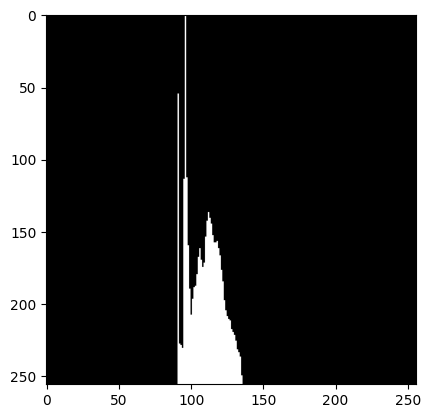

In [13]:
plt.imshow(hist_img(img2), cmap='gray')